# Credit Risk Analysis & Loan Default Prediction

**Problem Identification**

In the credit and loan process, banks need to assess default risk to maintain the quality of their credit portfolios. The objective of this project is to identify factors influencing default risk and develop predictive models to support credit decisions.

# 1. Load Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = r"C:\Users\Nur Aini Mahfud\Downloads\Bank_credit_risk_dataset.csv"
df = pd.read_csv(path)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# 2. Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.shape

(32581, 12)

In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# 3. Data Cleaning
 This steps performed data cleaning by:
1. Defining numeric and categorical columns
2. Removing duplicates
3. Handling empty values by filling the median for numeric columns and filling with the mode for categorical columns
4. Identifying and eliminating invalid values
5. Identifying and handling outliers
6. Encoding and scaling numeric columns

In [5]:
df_clean = df.copy()

In [6]:
num_cols = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length'
]

cat_cols = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'loan_status', 'cb_person_default_on_file'
]

In [7]:
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [8]:
df_clean['loan_int_rate'] = df_clean.groupby('loan_grade')['loan_int_rate']\
                                   .transform(lambda x: x.fillna(x.median()))

In [9]:
invalid_all = df_clean[
    (df_clean['person_age'] < 18) | (df_clean['person_age'] > 100) |
    (df_clean['person_emp_length'] < 0) | (df_clean['person_emp_length'] > 50) |
    (df_clean['loan_amnt'] <= 0) |
    (df_clean['loan_int_rate'] < 0) | (df_clean['loan_int_rate'] > 50) |
    (df_clean['person_income'] <= 0) |
    (df_clean['cb_person_cred_hist_length'] > 80)
]

invalid_all

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [12]:
df_clean = df_clean[
    (df_clean['person_age'].between(18, 100)) &
    (df_clean['person_income'].between(1, 1_000_000)) &
    (df_clean['person_emp_length'].between(0, 60)) &
    (df_clean['loan_amnt'].between(500, 50_000)) &
    (df_clean['loan_int_rate'].between(2, 30)) &
    (df_clean['loan_percent_income'].between(0, 1)) &
    (df_clean['cb_person_cred_hist_length'].between(0, 80))
    ]
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

In [14]:
df_clean[num_cols].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,25513.000000,25513.000000,25513.000000,25513.000000,25513.000000,25513.000000,25513.000000
mean,26.180849,58246.661623,4.355466,8405.493278,10.936184,0.159433,4.826677
std,3.964474,26668.115138,3.371768,4825.387768,3.169087,0.089434,2.705084
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,38300.000000,2.000000,4900.000000,7.880000,0.090000,3.000000
50%,25.000000,54000.000000,4.000000,7500.000000,10.990000,0.140000,4.000000
75%,28.000000,74000.000000,7.000000,11600.000000,13.480000,0.210000,7.000000
max,40.000000,141000.000000,14.000000,22500.000000,21.740000,0.410000,13.000000


In [15]:
df_clean.shape

(25513, 12)

# 3. Data Preprocessing

In [11]:
cat_cols = df_clean.select_dtypes(include=['object']).columns
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    if col in df_clean.columns:
        df_clean[col] = le.fit_transform(df_clean[col])
        df_clean

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25513 entries, 1 to 32293
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25513 non-null  int64  
 1   person_income               25513 non-null  int64  
 2   person_home_ownership       25513 non-null  int64  
 3   person_emp_length           25513 non-null  float64
 4   loan_intent                 25513 non-null  int64  
 5   loan_grade                  25513 non-null  int64  
 6   loan_amnt                   25513 non-null  int64  
 7   loan_int_rate               25513 non-null  float64
 8   loan_status                 25513 non-null  int64  
 9   loan_percent_income         25513 non-null  float64
 10  cb_person_default_on_file   25513 non-null  int64  
 11  cb_person_cred_hist_length  25513 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.5 MB


# 4. Modeling

In [13]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (20330, 11)
Test shape: (5083, 11)


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,        
    max_depth=None,         
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1              
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 5. Evaluation

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9276018099547512

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4064
           1       0.97      0.66      0.79      1019

    accuracy                           0.93      5083
   macro avg       0.94      0.83      0.87      5083
weighted avg       0.93      0.93      0.92      5083


Confusion Matrix:
 [[4040   24]
 [ 344  675]]


In [16]:
feature_names = X_train.columns
importances = rf.feature_importances_
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi_df

,Feature,Importance
8,loan_percent_income,0.202661
1,person_income,0.154631
7,loan_int_rate,0.129836
5,loan_grade,0.119554
2,person_home_ownership,0.081326
4,loan_intent,0.078957
6,loan_amnt,0.074592
3,person_emp_length,0.068575
0,person_age,0.044758
10,cb_person_cred_hist_length,0.034465


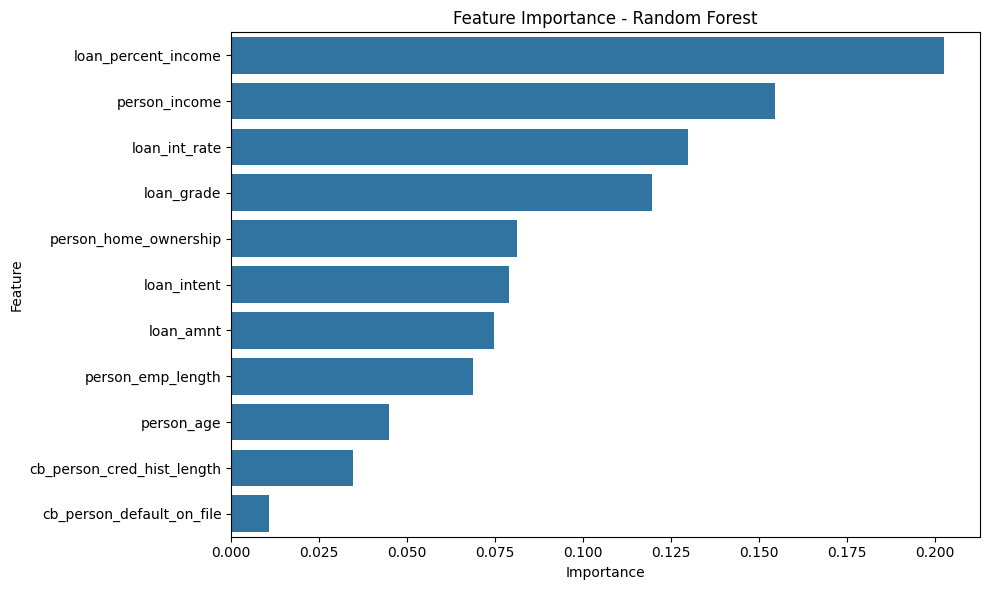

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x='Importance', y='Feature')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [28]:
print("Deskripsi pendapatan:")
print(df_clean['person_income'].describe(percentiles=[0.25, 0.5, 0.75]))

Deskripsi pendapatan:
count     25513.000000
mean      58246.661623
std       26668.115138
min        4080.000000
25%       38300.000000
50%       54000.000000
75%       74000.000000
max      141000.000000
Name: person_income, dtype: float64


# 6. Save Dataset & Model

In [39]:
df_clean.to_csv('credit_risk_cleaned.csv', index=False)

In [50]:
df_clean.to_csv('credit_risk_cleaned_final.csv', index=False)

In [43]:
df_pred = pd.DataFrame({
    'loan_status_actual': y,
    'loan_status_pred': rf.predict(X)
})
df_pred.to_csv('credit_risk_predictions.csv', index=False)

In [42]:
import pickle
with open('credit_risk_predictions.pkl', 'wb') as f:
    pickle.dump(fi_df, f)

In [46]:
fi_df.to_csv('feature_importance.csv', index=False)

In [44]:
import joblib
joblib.dump(rf, 'rf_credit_risk_model.pkl')

['rf_credit_risk_model.pkl']

In [45]:
rf_loaded = joblib.load('rf_credit_risk_model.pkl')

# 7. Rebuild bucket and re-predict with full dataset not just x_test

In [30]:
try:
    df_clean['income_bucket'] = pd.qcut(
        df_clean['person_income'],
        q=4,
        labels=['Low', 'Medium', 'High', 'Very High']
    )
except ValueError:
    df_clean['income_bucket'] = pd.qcut(
        df_clean['person_income'].rank(method='first'),
        q=4,
        labels=['Low', 'Medium', 'High', 'Very High']
    )


In [31]:
try:
    df_clean['int_rate_bucket'] = pd.qcut(
        df_clean['loan_int_rate'],
        q=4,
        labels=['Low', 'Medium', 'High', 'Very High']
    )
except ValueError:
    df_clean['int_rate_bucket'] = pd.qcut(
        df_clean['loan_int_rate'].rank(method='first'),
        q=4,
        labels=['Low', 'Medium', 'High', 'Very High']
    )


In [32]:
try:
    df_clean['loan_amount_bucket'] = pd.qcut(
        df_clean['loan_amnt'],
        q=4,
        labels=['Small', 'Medium', 'Large', 'Very Large']
    )
except ValueError:
    df_clean['loan_amount_bucket'] = pd.qcut(
        df_clean['loan_amnt'].rank(method='first'),
        q=4,
        labels=['Small', 'Medium', 'Large', 'Very Large']
    )


In [33]:
try:
    df_clean['credit_history_bucket'] = pd.qcut(
        df_clean['cb_person_cred_hist_length'],
        q=4,
        labels=['Short', 'Medium', 'Long', 'Very Long']
    )
except ValueError:
    df_clean['credit_history_bucket'] = pd.qcut(
        df_clean['cb_person_cred_hist_length'].rank(method='first'),
        q=4,
        labels=['Short', 'Medium', 'Long', 'Very Long']
    )


In [34]:
df_clean[['income_bucket', 'int_rate_bucket', 'loan_amount_bucket', 'credit_history_bucket']].head()


,income_bucket,int_rate_bucket,loan_amount_bucket,credit_history_bucket
1,Low,High,Small,Short
5,Low,Low,Small,Short
9,Low,Very High,Small,Short
19,Low,Medium,Small,Short
23,Low,Low,Small,Short


In [37]:
df_clean = df_clean.drop(columns=['loan_status_pred'], errors='ignore')

X_full = df_clean[X_train.columns]

df_clean['loan_status_pred'] = rf.predict(X_full)

df_full = df_clean.copy()
df_full


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_bucket,int_rate_bucket,loan_amount_bucket,credit_history_bucket,loan_status_pred
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,Low,High,Small,Short,0
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2,Low,Low,Small,Short,1
9,21,10000,2,6.0,5,3,1600,14.74,1,0.16,0,3,Low,Very High,Small,Short,1
19,24,10800,0,8.0,1,1,1750,10.99,1,0.16,0,2,Low,Medium,Small,Short,1
23,24,10980,2,0.0,4,0,1500,7.29,0,0.14,0,3,Low,Low,Small,Short,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32248,38,36000,0,3.0,2,2,6000,13.99,0,0.17,1,12,Low,Very High,Medium,Very Long,0
32256,38,59475,0,10.0,3,3,18125,14.84,1,0.26,1,13,High,Very High,Very Large,Very Long,1
32258,38,67870,0,6.0,3,1,5000,10.99,0,0.07,0,13,High,Medium,Medium,Very Long,0
32269,37,21600,3,4.0,3,3,3800,15.31,1,0.18,0,11,Low,Very High,Small,Very Long,1


In [38]:
df_full.to_csv("df_full_credit_risk.csv", index=False)